- **批量梯度下降法**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadData(filename):
    '''导入数据集
    :param filename: 数据文件路径
    :return:
        X：训练样本集
        y：训练样本的标记集
    '''
    X = []; y = []
    f = open(filename)
    for line in f.readlines():
        lineArr = line.strip().split('\t')
        X.append([1.0, float(lineArr[0]), float(lineArr[1])])
        #X.append([1.0, lineArr[0], lineArr[1]])
        y.append(int(lineArr[2]))
    return X, y

In [3]:
def sigmoid(x):
    '''sigmoid函数
    :param x: 输入数值或者向量
    :return: 经过sigmoid函数运算的结果
    '''
    return 1.0 / (1 + np.exp(-x))

In [4]:
def BatchGradientAscent(X, y, maxLoop):
    '''批量梯度下降法
    :param X: 训练数据
    :param y: 训练数据标记
    :param maxLoop: 梯度下降的次数
    :return: 返回最佳分类边界线/拟合曲线的参数
    '''
    X = np.mat(X)
    y = np.mat(y).transpose()
    #y = y.transpose()
    m, n = X.shape
    weights = np.ones((n, 1))
    alpha = 0.001
    for i in range(maxLoop):
        h = sigmoid(X * weights)
        error = (y - h)
        weights = weights + alpha * X.transpose() * error
    return weights

In [5]:
#导入训练数据：这里使用的数据简单，样本只有两个特征，二分类，采用线性拟合
filename = "testSet.txt"
X, y = loadData(filename)
X

[[1.0, -0.017612, 14.053064],
 [1.0, -1.395634, 4.662541],
 [1.0, -0.752157, 6.53862],
 [1.0, -1.322371, 7.152853],
 [1.0, 0.423363, 11.054677],
 [1.0, 0.406704, 7.067335],
 [1.0, 0.667394, 12.741452],
 [1.0, -2.46015, 6.866805],
 [1.0, 0.569411, 9.548755],
 [1.0, -0.026632, 10.427743],
 [1.0, 0.850433, 6.920334],
 [1.0, 1.347183, 13.1755],
 [1.0, 1.176813, 3.16702],
 [1.0, -1.781871, 9.097953],
 [1.0, -0.566606, 5.749003],
 [1.0, 0.931635, 1.589505],
 [1.0, -0.024205, 6.151823],
 [1.0, -0.036453, 2.690988],
 [1.0, -0.196949, 0.444165],
 [1.0, 1.014459, 5.754399],
 [1.0, 1.985298, 3.230619],
 [1.0, -1.693453, -0.55754],
 [1.0, -0.576525, 11.778922],
 [1.0, -0.346811, -1.67873],
 [1.0, -2.124484, 2.672471],
 [1.0, 1.217916, 9.597015],
 [1.0, -0.733928, 9.098687],
 [1.0, -3.642001, -1.618087],
 [1.0, 0.315985, 3.523953],
 [1.0, 1.416614, 9.619232],
 [1.0, -0.386323, 3.989286],
 [1.0, 0.556921, 8.294984],
 [1.0, 1.224863, 11.58736],
 [1.0, -1.347803, -2.406051],
 [1.0, 1.196604, 4.951851]

In [6]:
weight = BatchGradientAscent(X, y, 500)
weight

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [13]:
def plotBestFit(X, y, weights):
    '''绘制样本点和分类边界线
    :param X:训练数据
    :param y:训练数据的标记
    :param weights:求解得到的边界线的参数
    :return:
    '''
    X = np.array(X)
    #getA()的作用是将矩阵自身作为ndarray对象返回
    #weights = weights.getA()
    n = np.shape(X)[0]
    x1 = []; y1 = []
    x2 = []; y2 = []
    for i in range(n):
        if y[i] == 1:
            x1.append(X[i, 1])
            y1.append(X[i, 2])
        else:
            x2.append(X[i, 1])
            y2.append(X[i, 2])
    plt.figure()
    plt.scatter(x1, y1, s = 30, c = 'red')
    plt.scatter(x2, y2, s = 30, c = 'green')
    X_fit = np.arange(-3.0, 3.0, 0.1)
    y_fit = (-weights[0] - weights[1] * X_fit) / weights[2]
    plt.plot(X_fit, y_fit)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("The best fit of train set")
    plt.show()

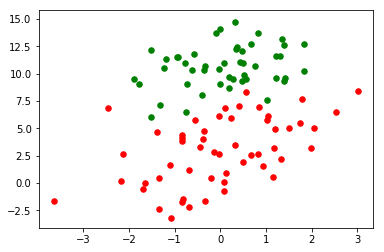

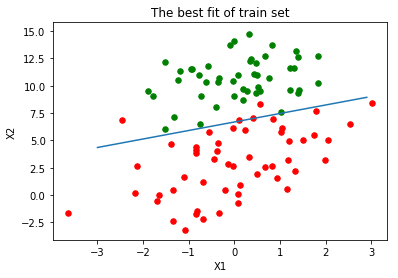

In [10]:
plotBestFit(X, y, weight)

- **随机梯度下降法**

In [11]:
def StochasticGradientDescent(X, y):
    '''随机梯度下降法
    :param X:
    :param y:
    :return: 返回参数矩阵
    '''
    X = np.array(X)
    m, n = np.shape(X)
    weights = np.ones(n)
    alpha = 0.009
    for i in range(m):
        h = sigmoid(sum(X[i] * weights))
        error = (y[i] - h)
        weights = weights + alpha * error * X[i]
    return weights

[ 1.00067496  0.87111216 -0.35960316]


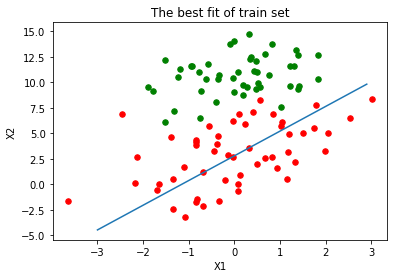

In [14]:
filename = "testSet.txt"
X, y = loadData(filename)
weight = StochasticGradientDescent(X, y)
print(weight)
plotBestFit(X, y, weight)

In [15]:
def StochasticGradientDescent_a1(X, y):
    '''随机梯度下降法改进1：重复随机梯度下降200次,绘制各个参数随迭代次数的变化图
    :param X:
    :param y:
    :return: 返回参数矩阵
    '''
    X = np.array(X)
    m, n = np.shape(X)
    weights = np.ones(n)
    print(weights)
    alpha = 0.01
    x0 = [1.0]; x1 = [1.0]; x2 = [1.0]
    for i in range(200):
        for j in range(m):
            h = sigmoid(sum(X[j] * weights))
            error = (y[j] - h)
            weights = weights + alpha * error * X[j]
            x0.append(weights[0])
            x1.append(weights[1])
            x2.append(weights[2])
    print("最终参数：w0:%f, w1:%f, w2:%f" % (weights[0], weights[1], weights[2]))
    x = range(0, 20001)
    fig = plt.figure()
    ax0 = fig.add_subplot(311)
    ax1 = fig.add_subplot(312)
    ax2 = fig.add_subplot(313)
    ax0.plot(x, x0)
    #ax0.ylabel("w0")
    ax1.plot(x, x1)
    #ax1.ylabel("w1")
    ax2.plot(x, x2)
    #ax2.ylabel("w2")
    plt.xlabel("number of loop")
    plt.show()
    return weights

[ 1.  1.  1.]
最终参数：w0:7.112823, w1:0.715852, w2:-1.049016


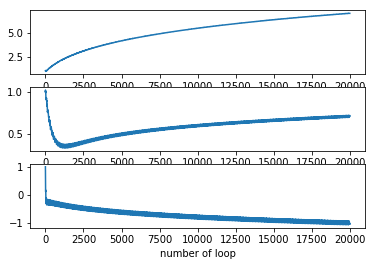

In [16]:
wei = StochasticGradientDescent_a1(X, y)

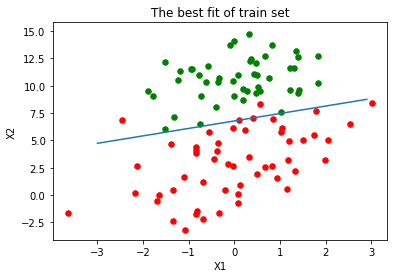

In [17]:
plotBestFit(X, y, wei)

In [64]:
def StochasticGradientDescent_a2(X, y):
    X = np.array(X)
    m, n = X.shape
    weights = np.ones(n)
    x0 = [1.0]; x1 = [1.0]; x2 = [1.0]
    for i in range(100):
        dataIndex = list(range(m))
        for j in range(m):
            index = int(np.random.uniform(0, len(dataIndex)))
            alpha = 4 / (1.0 + i + j) + 0.01
            h = sigmoid(sum(X[index] * weights))
            error = y[index] - h
            weights = weights + alpha * error * X[index]
            dataIndex.pop(index)
            x0.append(weights[0])
            x1.append(weights[1])
            x2.append(weights[2])
    fig = plt.figure()
    ax0 = fig.add_subplot(311)
    ax1 = fig.add_subplot(312)
    ax2 = fig.add_subplot(313)
    x = range(0, 10001)
    ax0.plot(x, x0)
    # ax0.ylabel("w0")
    ax1.plot(x, x1)
    # ax1.ylabel("w1")
    ax2.plot(x, x2)
    # ax2.ylabel("w2")
    plt.xlabel("number of iteration")
    plt.show()
    return weights

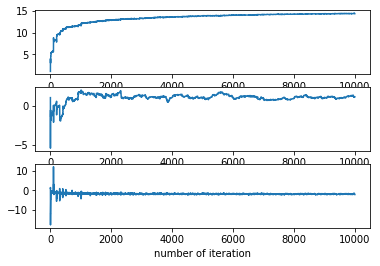

In [65]:
wei = StochasticGradientDescent_a2(X, y)

In [66]:
wei

array([ 14.4111062 ,   1.12088185,  -2.1992311 ])

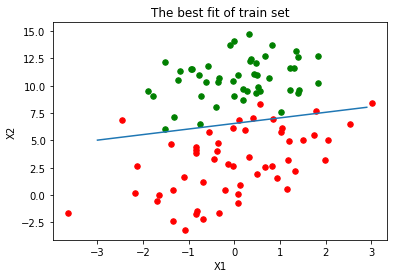

In [67]:
plotBestFit(X, y, wei)

实例：使用Logistic Regression来预测患有疝病的马的存活问题
数据集：数据集包含368个样本，每个样本有28个特征，分为训练集和测试集

In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [4]:
filename_train = "data\horseColicTraining.txt"
filename_test = "data\horseColicTest.txt"

In [5]:
#导入训练集和测试集
data_train = np.loadtxt(filename_train, dtype = float, delimiter = '\t')
X_train = data_train[:, : 21]
y_train = data_train[:, 21]
data_test = np.loadtxt(filename_test, dtype = float, delimiter = '\t')
X_test = data_test[:, : 21]
y_test = data_test[:, 21]

- 利用sklearn中的LogisticRegression进行训练测试

In [6]:
clf = LogisticRegression()

In [7]:
clf.fit(X_train, y_train)
accuracy1 = clf.score(X_test, y_test)

In [8]:
print("sklearn分类精确度为：%f" % accuracy1)

sklearn分类精确度为：0.731343


- 利用自己实现的基于随机梯度下降的Logistics Regression进行训练测试

In [10]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

def SGD(X, y, maxLoop = 150):
    X = np.array(X)
    m, n = np.shape(X)
    weights = np.ones(n)
    alpha = 0.01
    for i in range(maxLoop):
        for j in range(m):
            h = sigmoid(sum(X[j] * weights))
            error = y[j] - h
            weights = weights + alpha * error * X[j]
    return weights

def predict(X, weights):
    h = sum(X * weights)
    if h >= 0.0:
        return 1
    else:
        return 0

def score(X, y, weights):
    X = np.array(X)
    m = X.shape[0]
    count = 0.0
    for i in range(m):
        predict_label = predict(X[i], weights)
        if predict_label == int(y[i]):
            count += 1
    accuracy = count / m
    return accuracy

0 次迭代SGD分类精确度为：0.701493
50 次迭代SGD分类精确度为：0.656716
100 次迭代SGD分类精确度为：0.522388
150 次迭代SGD分类精确度为：0.626866
200 次迭代SGD分类精确度为：0.582090
250 次迭代SGD分类精确度为：0.716418
300 次迭代SGD分类精确度为：0.746269
350 次迭代SGD分类精确度为：0.567164
400 次迭代SGD分类精确度为：0.716418
450 次迭代SGD分类精确度为：0.582090
500 次迭代SGD分类精确度为：0.656716


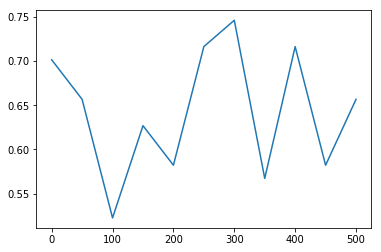

In [11]:
#比较不同迭代次数的分类精度[50:500:50]
l = []
for i in range(0, 550, 50):
    weights = SGD(X_train, y_train, maxLoop=i)
    accuracy2 = score(X_test, y_test, weights)
    l.append(accuracy2)
    print("%d 次迭代SGD分类精确度为：%f" % (i, accuracy2))
plt.figure()
x = range(0, 550, 50)
plt.plot(x, l)
plt.show()